## 목차
1. 데이터 준비  
    [1-1. 라이브러리 불러오기](#라이브러리-불러오기)  
    [1-2. 데이터 불러오기](#데이터-불러오기)  
2. 전처리  
    [2-1. 결측치 식별](#결측치-식별)  
    [2-2. 타입 변경](#타입-변경)  
    [2-3. 이상치 식별](#이상치-식별)  
    [2-4. 이상치 필터링](#이상치-필터링price)  
    [2-5. 카테고리 통일](#카테고리-통일)  
3. EDA  
    [3-1. 플랫폼 EDA](#platform-분포)  
    [3-2. Post time EDA](#플랫폼-별-post_time)  
    [3-3. title EDA](#title)  
    [3-4. 연속형 변수 EDA](#연속형-변수price-view_count-like_count-통계치-확인)  
    [3-5. 판매자 위치 EDA](#seller_location)  
    [3-6. Status EDA](#status)  
4. 데이터 저장  
    [4. 필터링 데이터 저장](#필터-데이터프레임-저장pickle_data)  

### 라이브러리 불러오기

In [311]:
# 라이브러리 불러오기기
import pandas as pd
import matplotlib.pyplot as plt
import openai
import json
import os
from dotenv import load_dotenv
from konlpy.tag import Okt
from tqdm import tqdm
import seaborn as sns
import numpy as np
import missingno as msno

In [312]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 데이터 불러오기

In [313]:
current_directory = os.getcwd()
data_directory = os.path.join(current_directory, '..', 'data')

In [318]:
data_file_path = os.path.join(data_directory, '오픈마켓 노쇼핑 샘플 데이터.xlsx')
sample_df = pd.read_excel(data_file_path)

In [319]:
sample_df.head()

,platform,original_link,post_time,title,view_count,like_count,price,images,description,category,...,seller_location,expiration_date,market_price,capacity,parking,options,check_in_out_time,shipping_fee,transaction_location,transaction_method
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,당근마켓,https://www.daangn.com/articles/836464147,2024-10-02 12:54:31.443000,호텔 양도,664,11,"11,111원",https://img.kr.gcp-karroter.net/origin/article...,"1. 횡성 웰리힐리파크리조트 \n- 10월 3일, 4일, 5일 패밀리룸 (15만원)...",티켓/교환권,...,연수구 송도3동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,당근마켓,https://www.daangn.com/articles/832373103,2024-10-02 12:53:31.443000,속초 체스터톤스 호텔,310,7,"170,000원",https://img.kr.gcp-karroter.net/origin/article...,속초 체스터톤스 숙박권입니다.\n3매구요~\n원하는 매수 만큼 가능하세요.\n투룸 ...,티켓/교환권,...,부천시 여월동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,당근마켓,https://www.daangn.com/articles/840996796,2024-10-02 12:52:31.443000,수성호텔 vip 티켓 1장,4,0,"34,000원",https://img.kr.gcp-karroter.net/origin/article...,"수성호텔 호텔수성 vip 티켓 (수영장,루프탑,인피니티풀, 온천, 사우나, 이벤트...",티켓/교환권,...,북구 매천동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,당근마켓,https://www.daangn.com/articles/840996718,2024-10-02 12:52:31.443000,코엑스 주차권 (유효기간없음),11,1,"5,000원",https://img.kr.gcp-karroter.net/origin/article...,코엑스 5시간 주차권입니다.\n(원래 코엑스 기본 주차요금 1시간 6000원) \n...,티켓/교환권,...,강남구 개포동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   platform              1421 non-null   object
 1   original_link         1421 non-null   object
 2   post_time             1421 non-null   object
 3   title                 1421 non-null   object
 4   view_count            1421 non-null   object
 5   like_count            1421 non-null   object
 6   price                 1421 non-null   object
 7   images                1417 non-null   object
 8   description           1421 non-null   object
 9   category              422 non-null    object
 10  status                922 non-null    object
 11  seller_location       272 non-null    object
 12  expiration_date       1 non-null      object
 13  market_price          1 non-null      object
 14  capacity              1 non-null      object
 15  parking               1 non-null      

In [322]:
sample_df.isnull().sum()

platform                   4
original_link              4
post_time                  4
title                      4
view_count                 4
like_count                 4
price                      4
images                     8
description                4
category                1003
status                   503
seller_location         1153
expiration_date         1424
market_price            1424
capacity                1424
parking                 1424
options                 1424
check_in_out_time       1424
shipping_fee            1424
transaction_location    1424
transaction_method      1424
dtype: int64

In [324]:
# 필요한(사용 가능한) 필드만 추출
sample_df = sample_df.iloc[:,0:12]

### 결측치 식별

In [325]:
sample_df.isnull().sum()

platform              4
original_link         4
post_time             4
title                 4
view_count            4
like_count            4
price                 4
images                8
description           4
category           1003
status              503
seller_location    1153
dtype: int64

<Axes: >

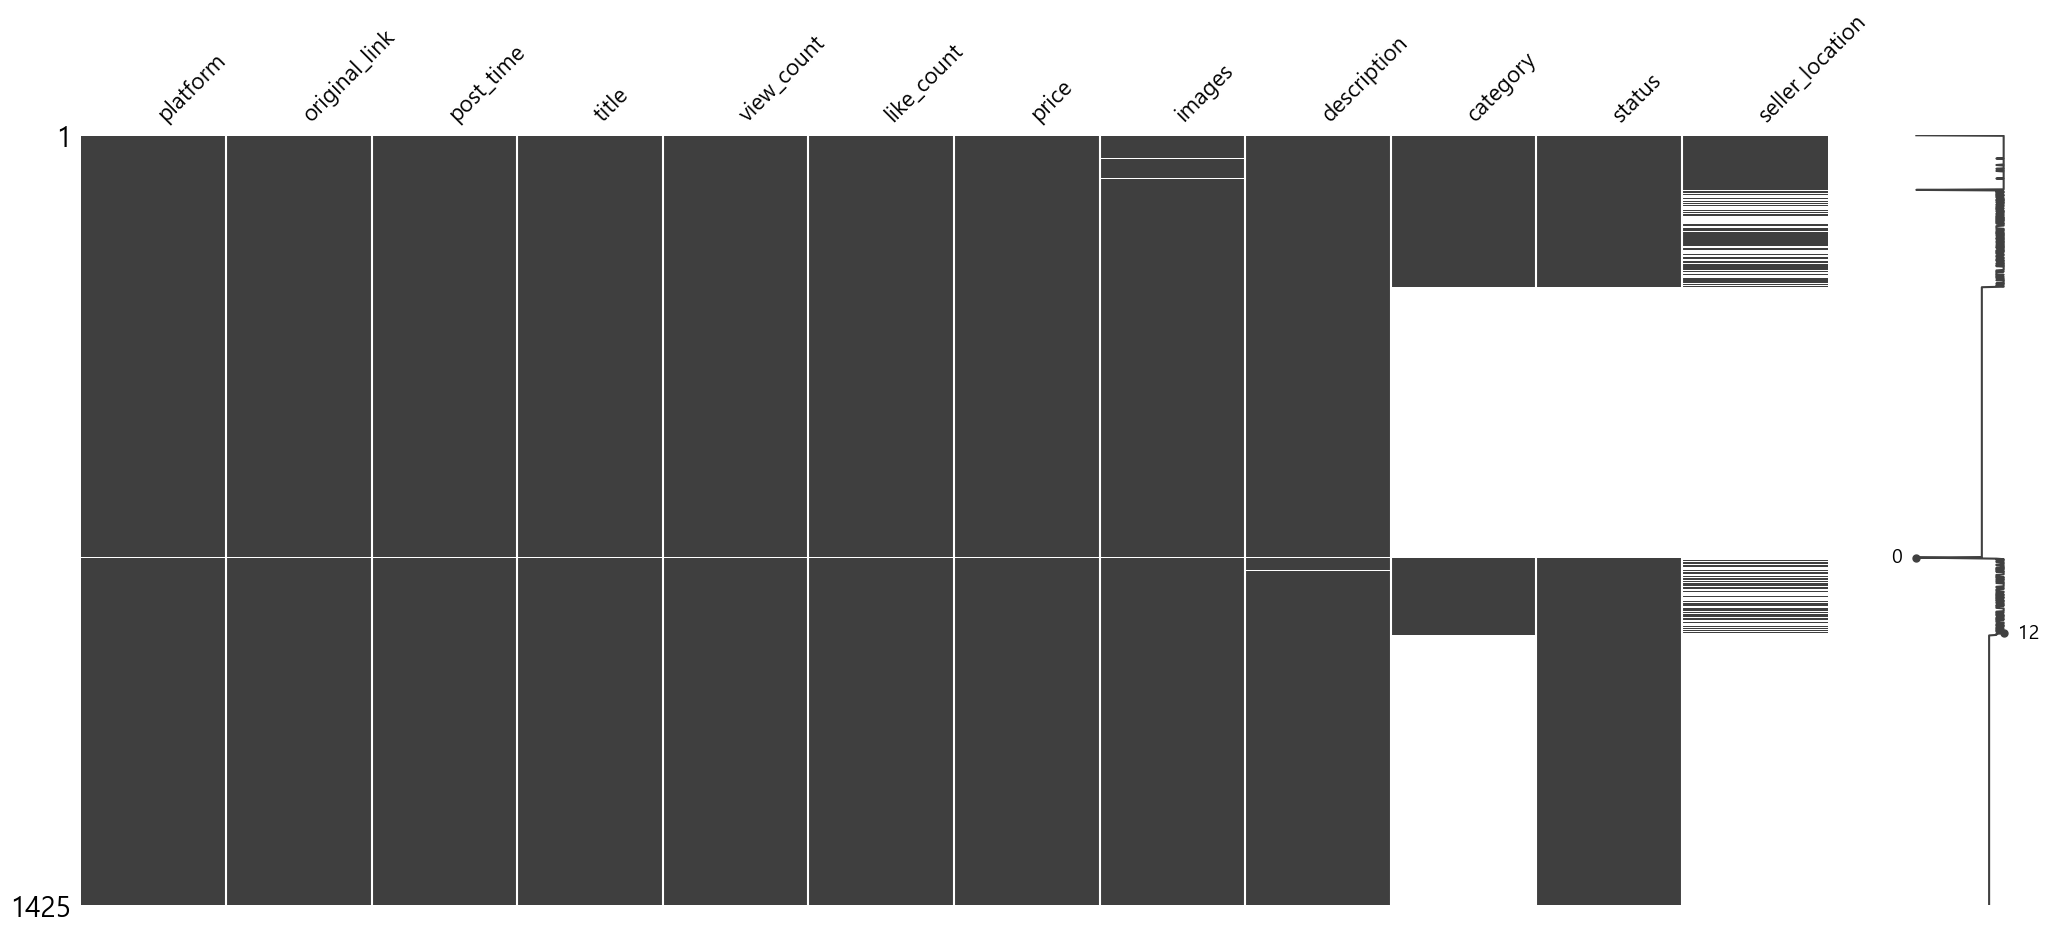

In [326]:
msno.matrix(sample_df)

특정 플랫폼에서 카테고리, status, 판매자_지역 정보가 통쨰로 없음

In [327]:
# 특정 4개 열 삭제(크롤링 단계에서 플랫폼 별 구분을 위해 빈 행을 집어넣음 -> 삭제)
sample_df.dropna(subset=['platform'],inplace=True)
sample_df.reset_index(drop=True, inplace=True)

C:\Users\gmldu\AppData\Local\Temp\ipykernel_2928\1709338618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df.dropna(subset=['platform'],inplace=True)


### 타입 변경

In [328]:
# price 필드 포맷 통일 후 타입 변경
sample_df['price'] = sample_df['price'].astype(str)
sample_df['price'] = sample_df['price'].str.replace(',','')\
                                        .str.replace('만원','0000')\
                                        .str.replace('만','')\
                                        .str.replace('원','')\
                                        .str.replace(' ','').astype(int)
# view_count 필드 포맷 통일 후 타입 변경
sample_df['view_count'] = sample_df['view_count'].astype(str)
sample_df['view_count'] = sample_df['view_count'].str.replace('조회 ', '').astype(int)
# like_count 필드 포맷 통일 후 타입 변경
sample_df['like_count'] = sample_df['like_count'].astype(str)
sample_df['like_count'] = sample_df['like_count'].str.replace('시세조회', '').astype(int)
# post_time date형식으로 타입 변경
sample_df['post_time'] = pd.to_datetime(sample_df['post_time'])

C:\Users\gmldu\AppData\Local\Temp\ipykernel_2928\840904841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['price'] = sample_df['price'].astype(str)
C:\Users\gmldu\AppData\Local\Temp\ipykernel_2928\840904841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['price'] = sample_df['price'].str.replace(',','')\
C:\Users\gmldu\AppData\Local\Temp\ipykernel_2928\840904841.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [329]:
# 중복 행 제거
sample_df.drop_duplicates(inplace=True)

C:\Users\gmldu\AppData\Local\Temp\ipykernel_2928\3639958134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df.drop_duplicates(inplace=True)


In [330]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1418 entries, 0 to 1420
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   platform         1418 non-null   object        
 1   original_link    1418 non-null   object        
 2   post_time        1418 non-null   datetime64[ns]
 3   title            1418 non-null   object        
 4   view_count       1418 non-null   int32         
 5   like_count       1418 non-null   int32         
 6   price            1418 non-null   int32         
 7   images           1413 non-null   object        
 8   description      1417 non-null   object        
 9   category         421 non-null    object        
 10  status           921 non-null    object        
 11  seller_location  271 non-null    object        
dtypes: datetime64[ns](1), int32(3), object(8)
memory usage: 127.4+ KB


### 이상치 식별

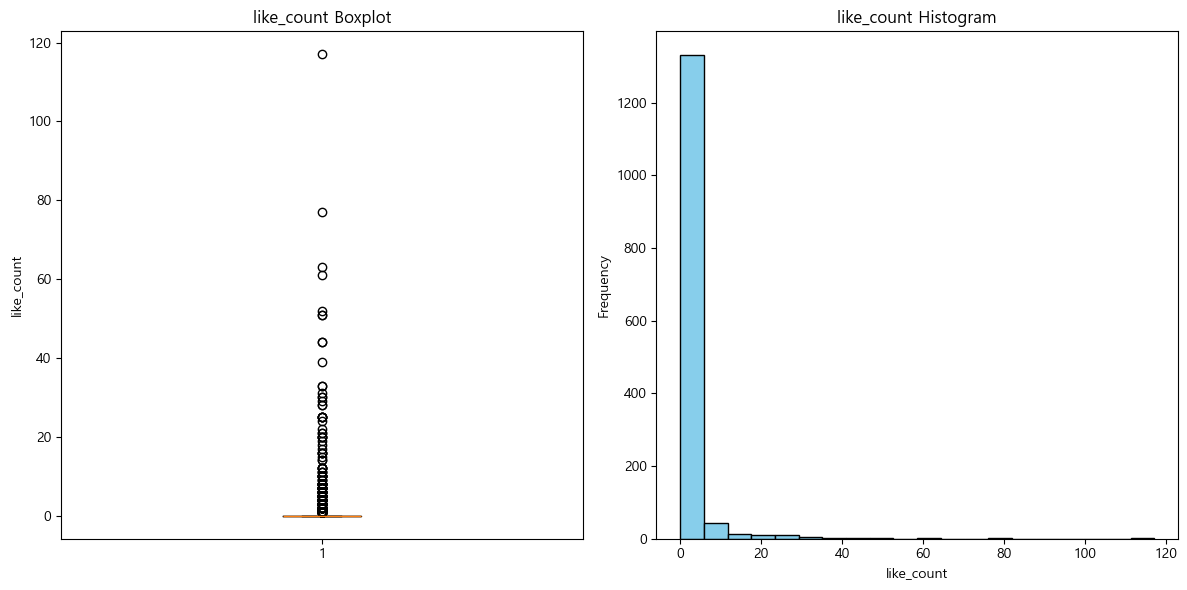

In [331]:
# like_count에 대한 박스플롯 및 히스토 그램
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

axes[0].boxplot(sample_df['like_count'])
axes[0].set_title('like_count Boxplot')
axes[0].set_ylabel('like_count')

axes[1].hist(sample_df['like_count'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('like_count Histogram')
axes[1].set_xlabel('like_count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

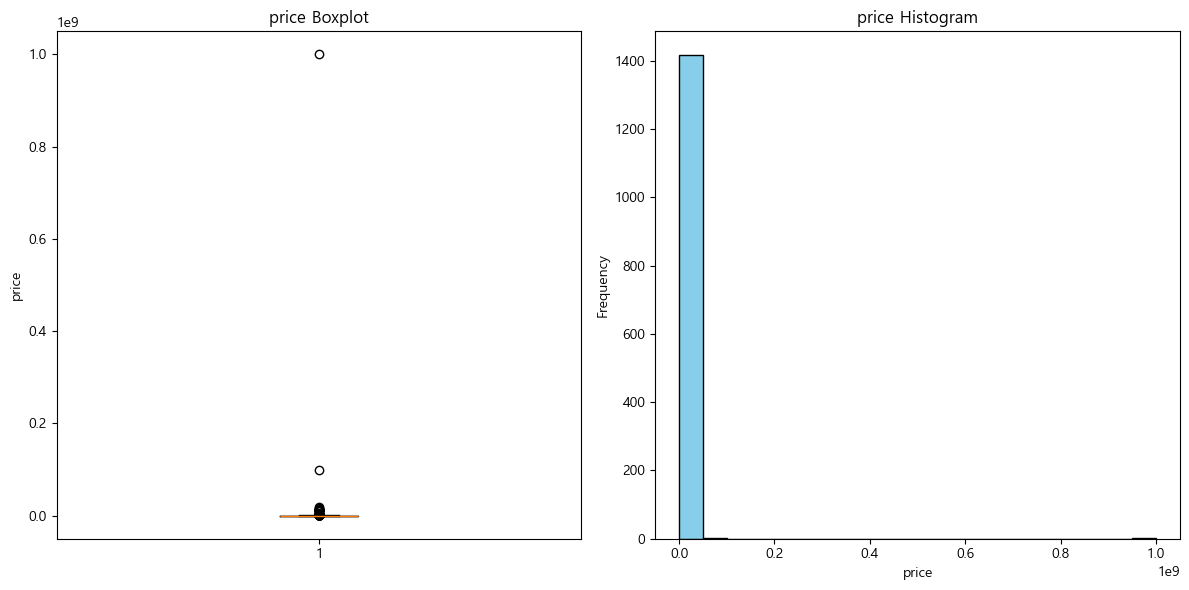

In [332]:
# price에 대한 박스플롯 및 히스토 그램
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

axes[0].boxplot(sample_df['price'])
axes[0].set_title('price Boxplot')
axes[0].set_ylabel('price')

axes[1].hist(sample_df['price'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('price Histogram')
axes[1].set_xlabel('price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

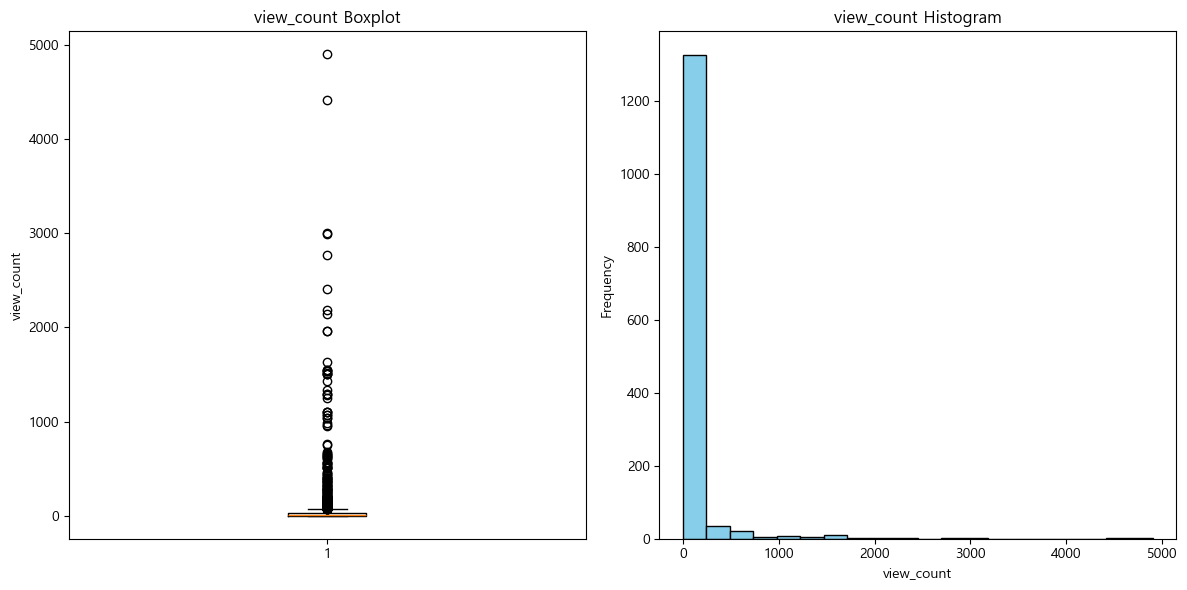

In [333]:
# view_count에 대한 박스플롯 및 히스토 그램
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

axes[0].boxplot(sample_df['view_count'])
axes[0].set_title('view_count Boxplot')
axes[0].set_ylabel('view_count')

axes[1].hist(sample_df['view_count'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('view_count Histogram')
axes[1].set_xlabel('view_count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 이상치 필터링(price)

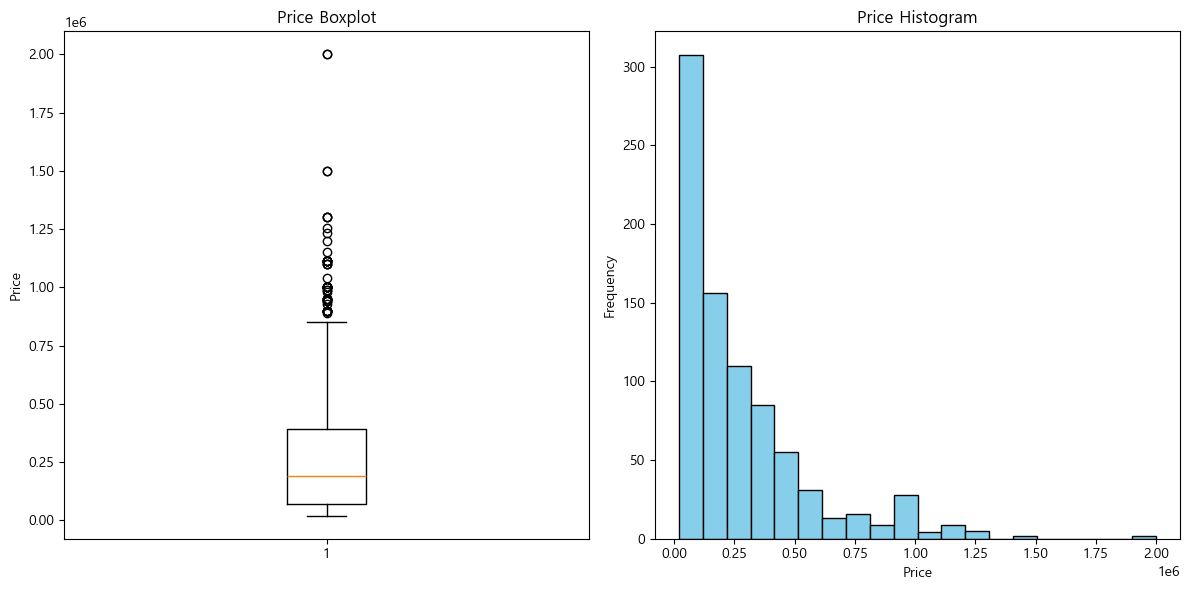

In [334]:
# 필터링된 price에 대한 박스플롯 및 히스토그램(2만원 이상 2백만원 이하)
filter_df = sample_df[(sample_df['price']>=20000)&(sample_df['price']<=2000000)]
filter_df.reset_index(drop=True,inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].boxplot(filter_df['price'])
axes[0].set_title('Price Boxplot')
axes[0].set_ylabel('Price')

axes[1].hist(filter_df['price'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('Price Histogram')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 카테고리 통일

In [335]:
filter_df['category'].value_counts()

category
여행/숙박/렌트       223
티켓/교환권          61
외식              28
생활/주방           10
가구/인테리어          8
콘서트              7
테마파크             5
만화               3
기타(상품권)          3
뷰티/미용            1
스포츠/레저           1
여성의류             1
취미/게임/음반         1
도서               1
기타(티켓)           1
가공식품             1
학습/사전/참고서        1
경제/경영            1
여행/취미/레저/건강      1
학습도구/문구/필기류      1
시/소설             1
Name: count, dtype: int64

카테고리 필터링 : 여행/숙박/렌트, 티켓/교환권, NAN(중고나라는 카테고리 기준으로 크롤링)

In [336]:
filter_df = filter_df[(filter_df['category'] =='여행/숙박/렌트')|(filter_df['category'] =='티켓/교환권')|(filter_df['category'].isnull())]
filter_df.reset_index(drop=True, inplace=True)

### Platform 분포

In [337]:
filter_df['platform'].value_counts()

platform
중고나라    472
번개장터    223
당근마켓     61
Name: count, dtype: int64

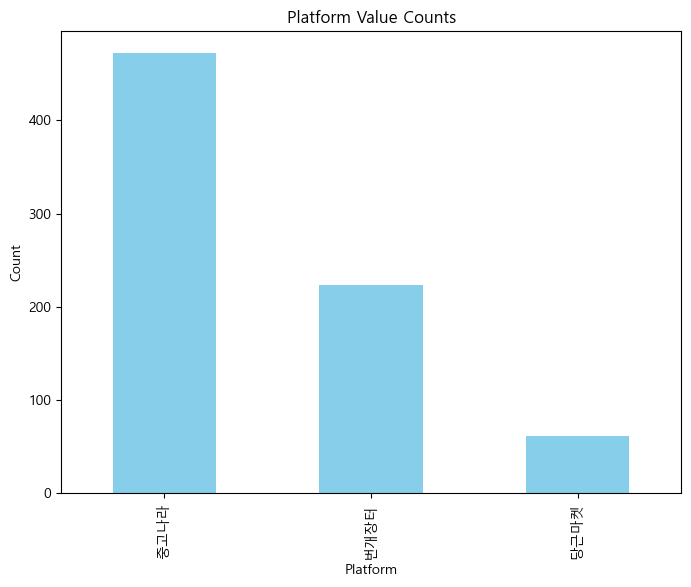

In [338]:
platform_counts = filter_df['platform'].value_counts()

plt.figure(figsize=(8, 6))
platform_counts.plot(kind='bar', color='skyblue')

plt.title('Platform Value Counts')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

### 플랫폼 별 Post_time

In [339]:
filter_df['post_time']

0     2024-10-02 12:53:31.443000
1     2024-10-02 12:52:31.443000
2     2024-10-02 12:52:31.443000
3     2024-10-02 12:35:31.443000
4     2024-10-02 12:33:31.443000
                 ...            
751   2024-10-08 15:34:44.709888
752   2024-10-08 15:34:44.709888
753   2024-10-08 15:34:44.709888
754   2024-10-08 15:34:44.709888
755   2024-10-08 15:34:44.709888
Name: post_time, Length: 756, dtype: datetime64[ns]

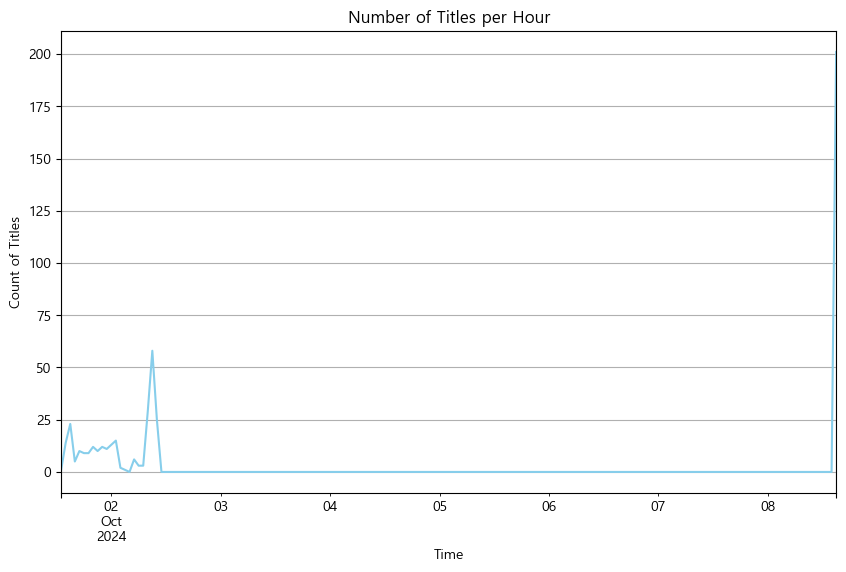

In [340]:
joongn_df = filter_df[filter_df['platform']=='중고나라']
title_counts = joongn_df.resample('H', on='post_time')['title'].count()

plt.figure(figsize=(10, 6))
title_counts.plot(kind='line', color='skyblue')

plt.title('Number of Titles per Hour')
plt.xlabel('Time')
plt.ylabel('Count of Titles')

plt.grid(True)
plt.show()

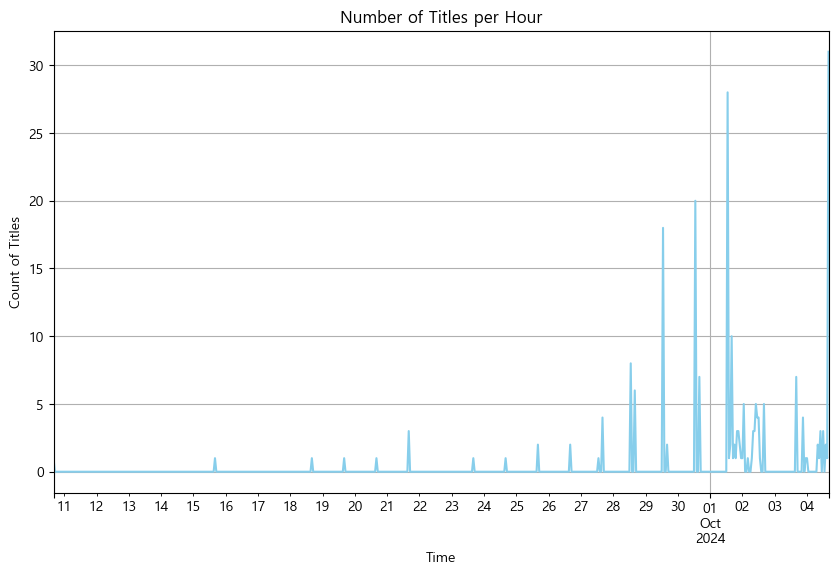

In [341]:
bunjang_df = filter_df[filter_df['platform']=='번개장터']
title_counts = bunjang_df.resample('H', on='post_time')['title'].count()

plt.figure(figsize=(10, 6))
title_counts.plot(kind='line', color='skyblue')

plt.title('Number of Titles per Hour')
plt.xlabel('Time')
plt.ylabel('Count of Titles')

plt.grid(True)
plt.show()

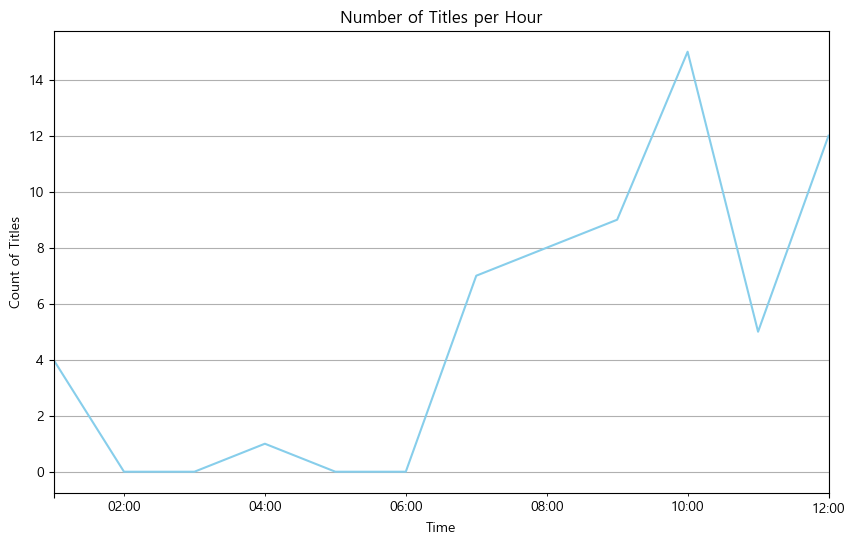

In [342]:
daangn_df = filter_df[filter_df['platform']=='당근마켓']
title_counts = daangn_df.resample('H', on='post_time')['title'].count()

plt.figure(figsize=(10, 6))
title_counts.plot(kind='line', color='skyblue')

plt.title('Number of Titles per Hour')
plt.xlabel('Time')
plt.ylabel('Count of Titles')

plt.grid(True)
plt.show()

### title

In [343]:
from konlpy.tag import Okt

In [344]:
# test
okt = Okt()

okt.nouns(filter_df['title'][0])

['속초', '체스터', '톤스', '호텔']

In [345]:
# 멀티쓰레딩 오류 뜸(BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore)
# from concurrent.futures import ProcessPoolExecutor

# def extract_nouns(text):
#     return okt.nouns(text)

# with ProcessPoolExecutor() as executor:
#     sample_df['title_nouns'] = list(executor.map(extract_nouns, sample_df['title']))


In [346]:
filter_df['title_nouns'] = [okt.nouns(title) for title in tqdm(filter_df['title'])]

  0%|          | 0/756 [00:00<?, ?it/s]

100%|██████████| 756/756 [00:13<00:00, 56.31it/s] 


In [347]:
filter_df['title_nouns']

0                                     [속초, 체스터, 톤스, 호텔]
1                                       [수성, 호텔, 티켓, 장]
2      [아난, 티, 리조트, 호텔, 가평, 코브, 빌라, 쥬드, 남해, 제주, 숙박, 양도]
3                                 [파타야, 힐튼, 호텔, 디럭스, 룸]
4                                          [글램, 호텔, 숙박]
                             ...                       
751                                 [대전, 교보, 노블, 리, 티켓]
752                    [인도네시아, 발리, 파, 디, 우메, 데, 숙소, 양도]
753                                        [호텔, 수성, 티켓]
754                            [제주도, 라마, 프라자, 오션, 뷰, 니]
755                                [내일, 대천해수욕장, 숙박, 신분]
Name: title_nouns, Length: 756, dtype: object

In [348]:
stopwords = set(['델피'])

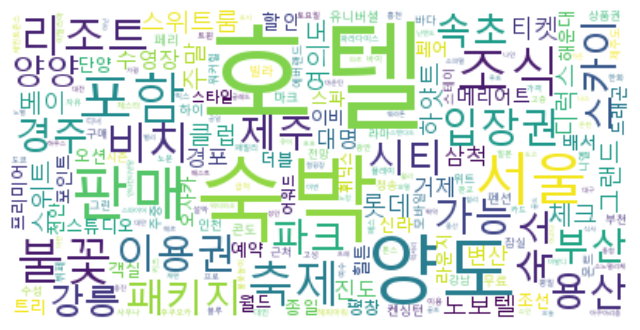

In [349]:
from collections import Counter
from wordcloud import WordCloud

noun_counts = Counter(
    noun for sublist in filter_df['title_nouns'] for noun in sublist 
    if noun not in stopwords and len(noun) > 1 
)

wordcloud = WordCloud(font_path='malgun.ttf', background_color='white').generate_from_frequencies(noun_counts)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [350]:
noun_counts

Counter({'호텔': 364,
         '숙박': 214,
         '양도': 135,
         '판매': 74,
         '서울': 67,
         '포함': 63,
         '조식': 58,
         '불꽃': 47,
         '축제': 43,
         '리조트': 38,
         '비치': 34,
         '입장권': 31,
         '가능': 30,
         '이용권': 29,
         '숙소': 27,
         '제주': 26,
         '패키지': 26,
         '용산': 25,
         '속초': 24,
         '파크': 24,
         '스카이': 24,
         '시티': 23,
         '경주': 23,
         '부산': 23,
         '강릉': 22,
         '양양': 21,
         '스위트룸': 20,
         '그랜드': 20,
         '주말': 20,
         '스위트': 20,
         '롯데': 20,
         '노보텔': 20,
         '클럽': 20,
         '체크': 19,
         '하얏트': 19,
         '티켓': 18,
         '디럭스': 18,
         '여의도': 18,
         '베이': 18,
         '수영장': 17,
         '진도': 17,
         '삼척': 17,
         '대명': 17,
         '변산': 17,
         '거제': 17,
         '경포': 16,
         '메리어트': 16,
         '할인': 16,
         '스튜디오': 16,
         '힐튼': 15,
         '더블': 15,
         '

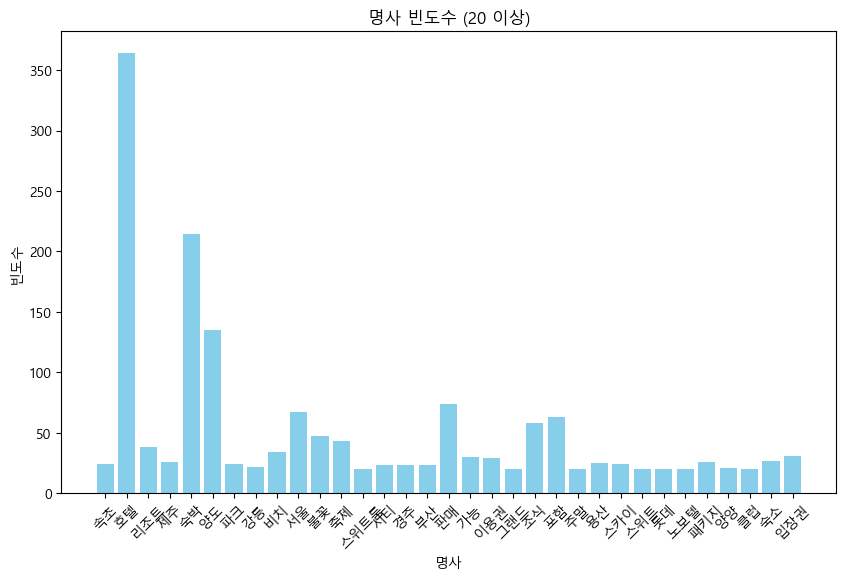

In [351]:
filtered_noun_counts = {noun: count for noun, count in noun_counts.items() if count >= 20}

filtered_df = pd.DataFrame(filtered_noun_counts.items(), columns=['noun', 'count'])
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['noun'], filtered_df['count'], color='skyblue')
plt.title('명사 빈도수 (20 이상)')
plt.xlabel('명사')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()

In [352]:
filter_df[~filter_df['title'].str.contains('임대|야놀자|입장권|상품권|포인트|야놀|주차권|쿠폰|구매|비행기|종일권|자유이용권', na=False)]
# test_df.to_csv('test_df.csv',encoding='utf-8-sig')

,platform,original_link,post_time,title,view_count,like_count,price,images,description,category,status,seller_location,title_nouns
0,당근마켓,https://www.daangn.com/articles/832373103,2024-10-02 12:53:31.443000,속초 체스터톤스 호텔,310,7,170000,https://img.kr.gcp-karroter.net/origin/article...,속초 체스터톤스 숙박권입니다.\n3매구요~\n원하는 매수 만큼 가능하세요.\n투룸 ...,티켓/교환권,판매중,부천시 여월동,"[속초, 체스터, 톤스, 호텔]"
1,당근마켓,https://www.daangn.com/articles/840996796,2024-10-02 12:52:31.443000,수성호텔 vip 티켓 1장,4,0,34000,https://img.kr.gcp-karroter.net/origin/article...,"수성호텔 호텔수성 vip 티켓 (수영장,루프탑,인피니티풀, 온천, 사우나, 이벤트...",티켓/교환권,판매중,북구 매천동,"[수성, 호텔, 티켓, 장]"
2,당근마켓,https://www.daangn.com/articles/840996562,2024-10-02 12:52:31.443000,"아난티 리조트호텔 가평, 코브, 빌라쥬드, 남해, 제주 숙박권 양도",12,0,540000,https://img.kr.gcp-karroter.net/origin/article...,"남해 빼고 (평일)일-목 체크인 가능, 금토 불가.\n남해 주말권만 금,토 체크인 ...",티켓/교환권,판매중,남구 사직동,"[아난, 티, 리조트, 호텔, 가평, 코브, 빌라, 쥬드, 남해, 제주, 숙박, 양도]"
3,당근마켓,https://www.daangn.com/articles/840986215,2024-10-02 12:35:31.443000,파타야 힐튼호텔 디럭스룸 10/12~13,21,0,400000,https://img.kr.gcp-karroter.net/origin/article...,연락주세요,티켓/교환권,판매중,수원시 영통구 영통동,"[파타야, 힐튼, 호텔, 디럭스, 룸]"
4,당근마켓,https://www.daangn.com/articles/840984922,2024-10-02 12:33:31.443000,글램 호텔 숙박,57,0,60000,https://img.kr.gcp-karroter.net/origin/article...,경희대 글램 호텔 숙박권 판매합니다.\n연락주세요:),티켓/교환권,판매중,종로구 창신제2동,"[글램, 호텔, 숙박]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,중고나라,https://web.joongna.com/product/188212658,2024-10-08 15:34:44.709888,대전 교보노블리에 티켓 팝니다,1,0,100000,https://img2.joongna.com/cafe-article-data/liv...,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...,NaN,판매중,NaN,"[대전, 교보, 노블, 리, 티켓]"
752,중고나라,https://web.joongna.com/product/186711023,2024-10-08 15:34:44.709888,인도네시아 발리 [와파 디 우메 시데멘] 숙소 양도,32,0,400000,https://img2.joongna.com/media/original/2024/0...,인도네시아 발리 [와파 디 우메 시데멘]\n\n개인일정 변경으로 1 베드룸 풀빌라...,NaN,판매중,NaN,"[인도네시아, 발리, 파, 디, 우메, 데, 숙소, 양도]"
753,중고나라,https://web.joongna.com/product/117868516,2024-10-08 15:34:44.709888,호텔수성 vip 티켓,54,0,59000,https://img2.joongna.com/media/original/2023/0...,유효기간 없어요 !!!,NaN,판매중,NaN,"[호텔, 수성, 티켓]"
754,중고나라,https://web.joongna.com/product/188207586,2024-10-08 15:34:44.709888,제주도 라마다프라자 오션뷰 양도합니다ㅠㅠ!!!,4,0,199000,https://img2.joongna.com/cafe-article-data/liv...,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...,NaN,판매중,NaN,"[제주도, 라마, 프라자, 오션, 뷰, 니]"


In [353]:
filter_df[filter_df['title'].str.contains('양도|숙박권|호텔|리조트|펜션', na=False)].head()
# test_df.to_csv('test_df.csv',encoding='utf-8-sig')

,platform,original_link,post_time,title,view_count,like_count,price,images,description,category,status,seller_location,title_nouns
0,당근마켓,https://www.daangn.com/articles/832373103,2024-10-02 12:53:31.443,속초 체스터톤스 호텔,310,7,170000,https://img.kr.gcp-karroter.net/origin/article...,속초 체스터톤스 숙박권입니다.\n3매구요~\n원하는 매수 만큼 가능하세요.\n투룸 ...,티켓/교환권,판매중,부천시 여월동,"[속초, 체스터, 톤스, 호텔]"
1,당근마켓,https://www.daangn.com/articles/840996796,2024-10-02 12:52:31.443,수성호텔 vip 티켓 1장,4,0,34000,https://img.kr.gcp-karroter.net/origin/article...,"수성호텔 호텔수성 vip 티켓 (수영장,루프탑,인피니티풀, 온천, 사우나, 이벤트...",티켓/교환권,판매중,북구 매천동,"[수성, 호텔, 티켓, 장]"
2,당근마켓,https://www.daangn.com/articles/840996562,2024-10-02 12:52:31.443,"아난티 리조트호텔 가평, 코브, 빌라쥬드, 남해, 제주 숙박권 양도",12,0,540000,https://img.kr.gcp-karroter.net/origin/article...,"남해 빼고 (평일)일-목 체크인 가능, 금토 불가.\n남해 주말권만 금,토 체크인 ...",티켓/교환권,판매중,남구 사직동,"[아난, 티, 리조트, 호텔, 가평, 코브, 빌라, 쥬드, 남해, 제주, 숙박, 양도]"
3,당근마켓,https://www.daangn.com/articles/840986215,2024-10-02 12:35:31.443,파타야 힐튼호텔 디럭스룸 10/12~13,21,0,400000,https://img.kr.gcp-karroter.net/origin/article...,연락주세요,티켓/교환권,판매중,수원시 영통구 영통동,"[파타야, 힐튼, 호텔, 디럭스, 룸]"
4,당근마켓,https://www.daangn.com/articles/840984922,2024-10-02 12:33:31.443,글램 호텔 숙박,57,0,60000,https://img.kr.gcp-karroter.net/origin/article...,경희대 글램 호텔 숙박권 판매합니다.\n연락주세요:),티켓/교환권,판매중,종로구 창신제2동,"[글램, 호텔, 숙박]"


In [354]:
filter_df[(~filter_df['title'].str.contains('호텔', na = False))&(~filter_df['title'].str.contains('리조트', na = False))]['title'].tail()

750     담서원(에어비앤비 인기숙소) 숙박 숙소 여행 관광
751                대전 교보노블리에 티켓 팝니다
752    인도네시아 발리 [와파 디 우메 시데멘] 숙소 양도
754       제주도 라마다프라자 오션뷰 양도합니다ㅠㅠ!!!
755        내일 8일 대천해수욕장 숙박 싸게 필요하신분
Name: title, dtype: object

### 연속형 변수(price, view_count, like_count) 통계치 확인

In [355]:
filter_df[['price','view_count','like_count']].describe()

,price,view_count,like_count
count,7.560000e+02,756.000000,756.000000
mean,2.884418e+05,100.269841,1.866402
std,2.880105e+05,371.754514,7.620772
min,2.000000e+04,0.000000,0.000000
25%,7.800000e+04,3.000000,0.000000
50%,2.000000e+05,11.000000,0.000000
75%,4.000000e+05,46.250000,1.000000
max,2.000000e+06,4899.000000,117.000000


In [356]:
filter_df[['price','view_count','like_count']].corr()

,price,view_count,like_count
price,1.000000,-0.031837,-0.028832
view_count,-0.031837,1.000000,0.896927
like_count,-0.028832,0.896927,1.000000


<Axes: >

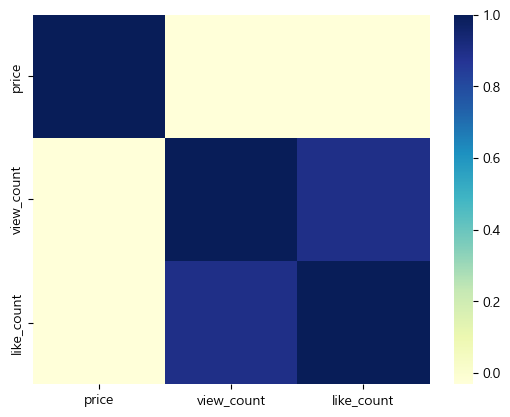

In [357]:
sns.heatmap(filter_df[['price','view_count','like_count']].corr(), cmap="YlGnBu")

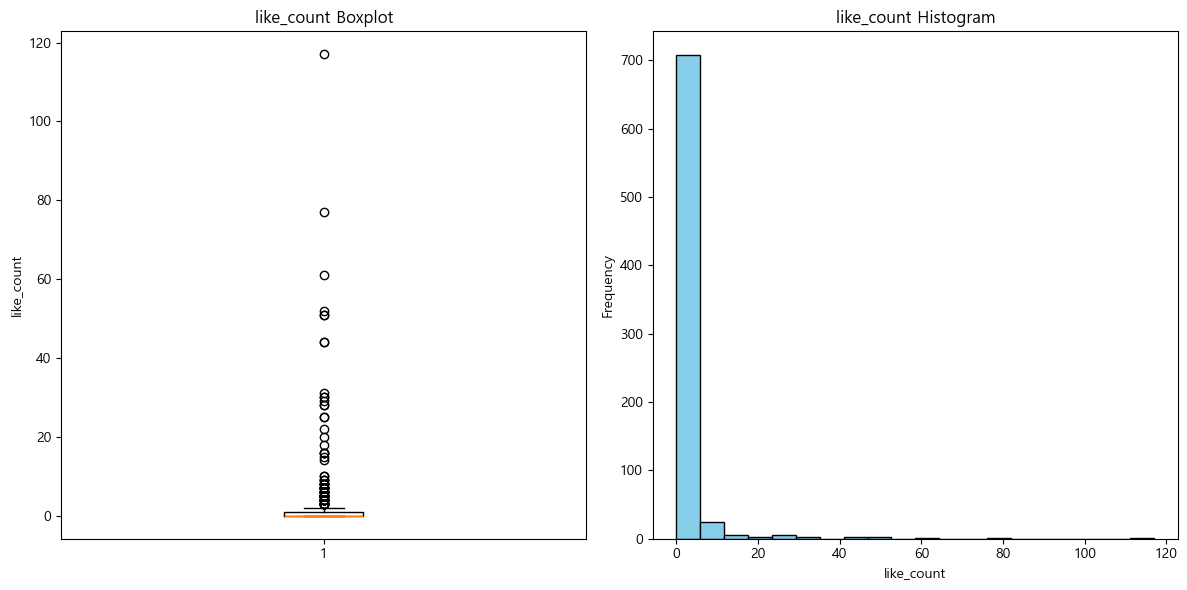

In [358]:
# like_count에 대한 박스플롯 및 히스토 그램
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

axes[0].boxplot(filter_df['like_count'])
axes[0].set_title('like_count Boxplot')
axes[0].set_ylabel('like_count')

axes[1].hist(filter_df['like_count'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('like_count Histogram')
axes[1].set_xlabel('like_count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

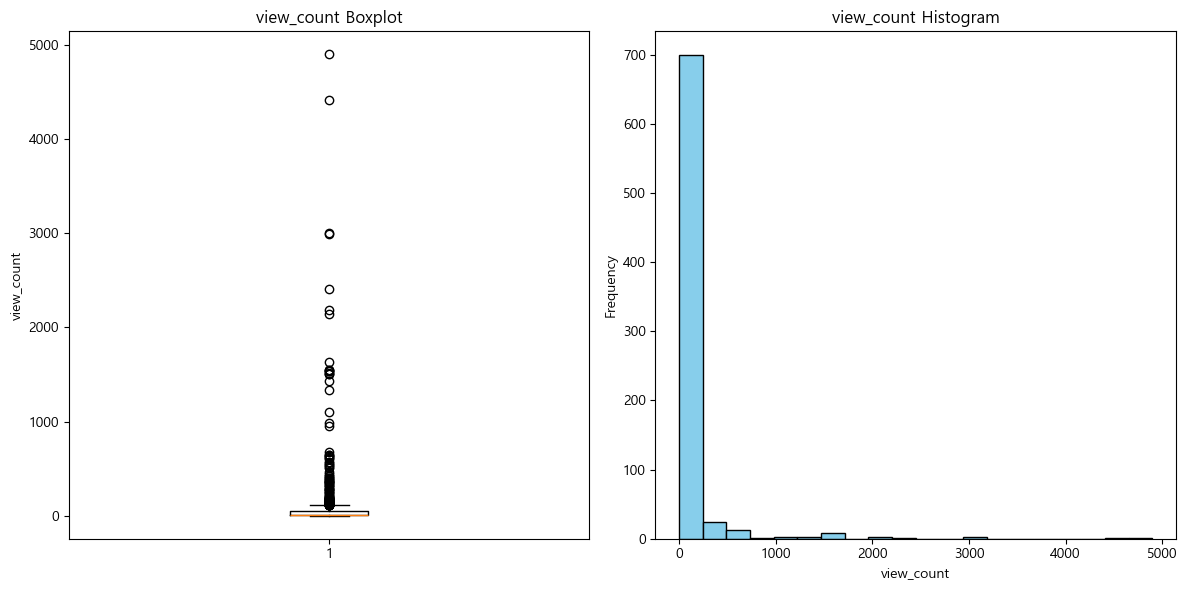

In [359]:
# view_count에 대한 박스플롯 및 히스토 그램
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

axes[0].boxplot(filter_df['view_count'])
axes[0].set_title('view_count Boxplot')
axes[0].set_ylabel('view_count')

axes[1].hist(filter_df['view_count'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('view_count Histogram')
axes[1].set_xlabel('view_count')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

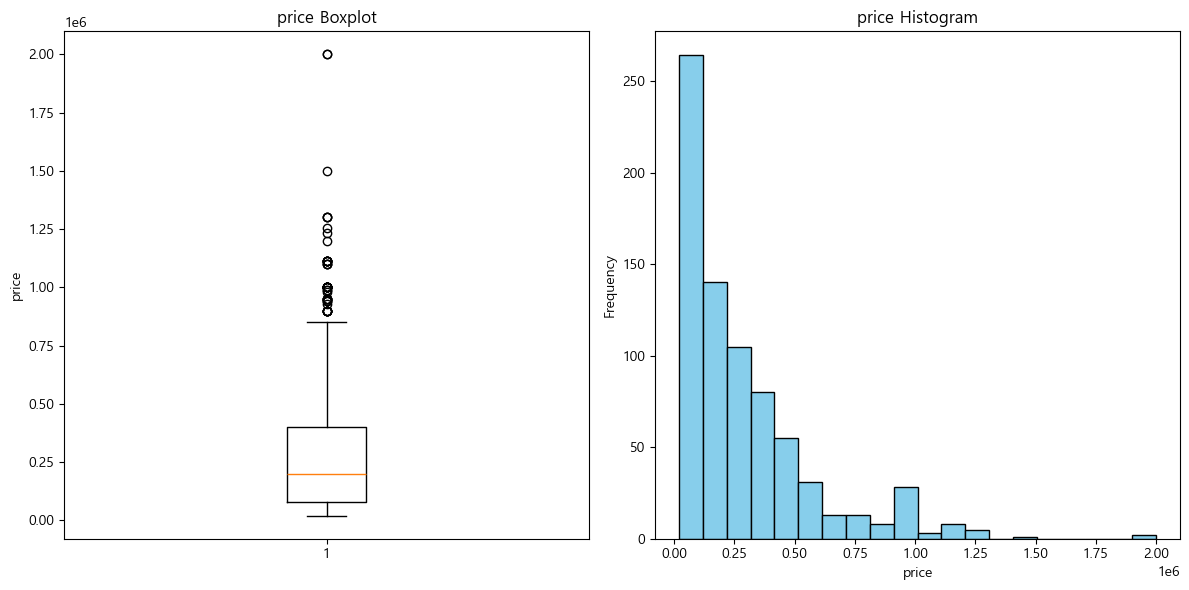

In [360]:
# price에 대한 박스플롯 및 히스토 그램
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

axes[0].boxplot(filter_df['price'])
axes[0].set_title('price Boxplot')
axes[0].set_ylabel('price')

axes[1].hist(filter_df['price'], bins=20, color='skyblue', edgecolor='black')
axes[1].set_title('price Histogram')
axes[1].set_xlabel('price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [361]:
filter_df.shape

(756, 13)

### seller_location

In [362]:
filter_df['seller_location'].value_counts()

seller_location
용산구 용산2가동      14
동안구 호계2동        6
성동구 송정동         4
관악구 인헌동         3
강남구 역삼1동        3
               ..
천안시 서북구 백석동     1
서구 청라2동         1
영등포구 당산동        1
대덕구 중리동         1
남양주시 다산2동       1
Name: count, Length: 135, dtype: int64

In [363]:
filter_df['seller_location_1'] = filter_df['seller_location'].apply(lambda x: x.split()[0] if isinstance(x, str) else np.nan)

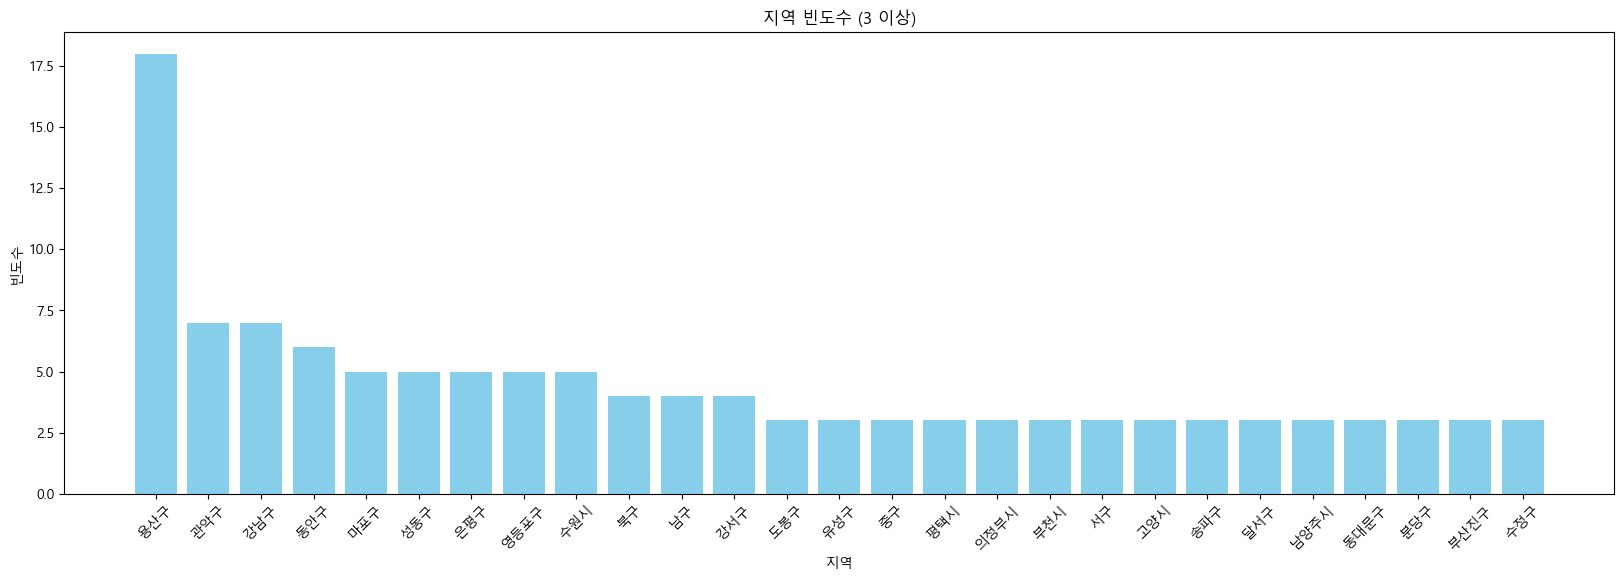

In [364]:
loc_df = pd.DataFrame(filter_df['seller_location_1'].value_counts())

filter_loc_df = loc_df[loc_df['count']>=3]
plt.figure(figsize=(20, 6))
plt.bar(filter_loc_df.index, filter_loc_df['count'], color='skyblue')
plt.title('지역 빈도수 (3 이상)')
plt.xlabel('지역')
plt.ylabel('빈도수')
plt.xticks(rotation=45)
plt.show()

### status

In [365]:
filter_df['status'].value_counts()

status
판매중         331
SELLING     116
판매완료         34
RESERVED      4
Name: count, dtype: int64

In [366]:
filter_df['status'] = filter_df['status'].str.replace('SELLING','판매중').str.replace('RESERVED','예약중')

In [367]:
filter_df['status'].value_counts()

status
판매중     447
판매완료     34
예약중       4
Name: count, dtype: int64

In [368]:
bunjang_df = filter_df[filter_df['platform'] == '번개장터']

In [369]:
bunjang_df[bunjang_df['status'] == '판매완료']['like_count'].mean()

1.0588235294117647

In [370]:
bunjang_df[bunjang_df['status'] == '판매중']['view_count'].mean()

325.4864864864865

In [371]:
bunjang_df[bunjang_df['status'] == '판매완료']['view_count'].mean()

66.41176470588235

### 필터 데이터프레임 저장(pickle_data)

In [372]:
filter_df.to_pickle(os.path.join(data_directory, "filter_df.pickle"))